Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

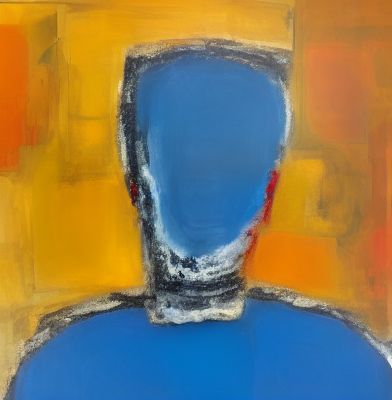

In [38]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
def load_image_local(path):
    image = PIL.Image.open(path)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = load_image_local('profile.jpg')

prompt = "Abstract Expressionism"
images = pipe(prompt, image=image, num_inference_steps=15, image_guidance_scale=1).images
images[0]


In [27]:

images[0].save("output.jpg")

